In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Input, Dense, LeakyReLU, BatchNormalization, ReLU
from keras.layers import Conv2D, Conv2DTranspose, Reshape, Flatten,Dropout
from keras.optimizers import Adam
from keras import initializers
from keras.utils import plot_model
from keras import backend as K

In [2]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

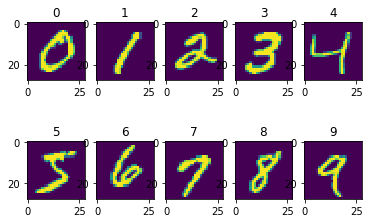

In [4]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2,5,i+1)
    examp = X_train[y_train == i][0]
    plt.imshow(examp)
    plt.title(str(i))

In [5]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

input_dim = (28,28,1)

X_train = (np.float32(X_train)/255 - 0.5)*2
X_train = np.clip(X_train,-1,1)

X_train.shape


(60000, 28, 28, 1)

In [6]:
init = initializers.RandomNormal(stddev=0.02)
latent_space_dim = 100

img_dim = 784


#Discriminator
d = Sequential()
d.add(Conv2D(32, kernel_size=3, strides=2, padding='same',
                         input_shape=(28, 28, 1), kernel_initializer=init))
d.add(LeakyReLU(0.2))

d.add(Conv2D(64, kernel_size=3, strides=2, padding='same'))
d.add(BatchNormalization(momentum=0.8))
d.add(LeakyReLU(0.2))

d.add(Conv2D(128, kernel_size=3, strides=2, padding='same'))
d.add(BatchNormalization(momentum=0.8))
d.add(LeakyReLU(0.2))

d.add(Flatten())

d.add(Dropout(0.5))

d.add(Dense(1,activation = 'sigmoid'))


d.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 64)          256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 4, 4, 128)        

In [7]:
optimizer = Adam(lr=0.0002, beta_1=0.5)

d.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [8]:
#Generator Network

g = Sequential()

g.add(Dense(7*7*128, input_shape = (latent_space_dim,), kernel_initializer = init))
g.add(Reshape((7,7,128)))


g.add(Conv2DTranspose(64, kernel_size=3, strides=2, padding='same'))
g.add(BatchNormalization(momentum=0.8))
g.add(ReLU(0.2))

g.add(Conv2DTranspose(32, kernel_size=3, strides=1, padding='same'))
g.add(BatchNormalization(momentum=0.8))
g.add(ReLU(0.2))

g.add(Conv2DTranspose(1, kernel_size=3, strides=2, padding='same', activation='tanh'))

g.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 64)        73792     
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 32)        18464     
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 32)       

In [9]:
d.trainable = False

z = Input(shape=(latent_space_dim,))
img = g(z)
decision = d(img)
d_g = Model(inputs=z, outputs=decision)

d_g.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])
d_g.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 28, 28, 1)         726401    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 95489     
Total params: 821,890
Trainable params: 726,209
Non-trainable params: 95,681
_________________________________________________________________


epoch = 1/20, d_loss=0.184, g_loss=5.590                                                                                                                       


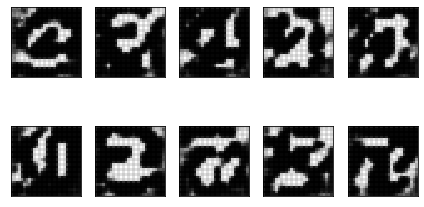

epoch = 2/20, d_loss=0.187, g_loss=4.360                                                                                                                       
epoch = 3/20, d_loss=0.242, g_loss=4.314                                                                                                                       
epoch = 4/20, d_loss=0.306, g_loss=3.608                                                                                                                      
epoch = 5/20, d_loss=1.097, g_loss=1.245                                                                                                                      
epoch = 6/20, d_loss=0.541, g_loss=2.452                                                                                                                      
epoch = 7/20, d_loss=0.218, g_loss=5.052                                                                                                                      
epoch = 8/20, d_loss=0.231, g_loss=4.497    

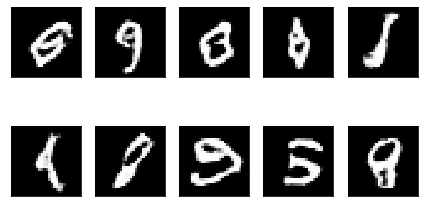

epoch = 12/20, d_loss=0.289, g_loss=3.527                                                                                                                      
epoch = 13/20, d_loss=0.348, g_loss=2.859                                                                                                                      
epoch = 14/20, d_loss=0.270, g_loss=3.484                                                                                                                      
epoch = 15/20, d_loss=0.270, g_loss=3.385                                                                                                                      
epoch = 16/20, d_loss=0.263, g_loss=3.721                                                                                                                      
epoch = 17/20, d_loss=0.249, g_loss=3.157                                                                                                                      
epoch = 18/20, d_loss=0.273, g_loss=3.56

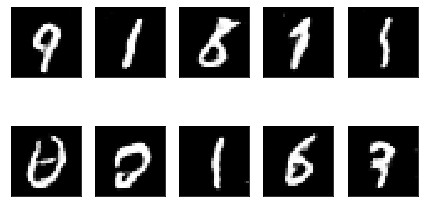

In [12]:
epochs = 20
batch_size = 64
smooth = 0.1

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
d_g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train) // batch_size):

        # Train Discriminator weights
        d.trainable = True

        # Real samples
        X_batch = X_train[i*batch_size:(i+1)*batch_size]
        d_loss_real = d.train_on_batch(x=X_batch, y=real * (1 - smooth))

        # Fake Samples
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_space_dim))
        X_fake = g.predict_on_batch(z)
        d_loss_fake = d.train_on_batch(x=X_fake, y=fake)

        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])

        # Train Generator weights
        d.trainable = False
        d_g_loss_batch = d_g.train_on_batch(x=z, y=real)

        print(
            'epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, i, len(X_train) // batch_size, d_loss_batch, d_g_loss_batch[0]),
            100*' ',
            end='\r'
        )

    d_loss.append(d_loss_batch)
    d_g_loss.append(d_g_loss_batch[0])
    print('epoch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, d_loss[-1], d_g_loss[-1]), 100*' ')

    if e % 10 == 0:
        samples = 10
        x_fake = g.predict(np.random.normal(loc=0, scale=1, size=(samples, latent_space_dim)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()